# Create logo using Logomaker (DNA example)

As an example file - I will use a list of aligned transcription factor bidning sites (sequences from ggseqlogo package in R, deposited as sample sequences)

### Step 1 - Load the needed packages

In [1]:
import pandas as pd
from Bio import SeqIO
from Bio.Data import IUPACData
from Bio import motifs
import matplotlib.pyplot as plt
import logomaker as lm
%matplotlib inline

In [2]:
DNA_seq = []
for record in SeqIO.parse("./DNA.fasta", "fasta"):
    DNA_seq.append(record.seq)

Check up step 1 - Check if the file was parsed correctly & get familiar with the data.

In [3]:
print(len(DNA_seq))

97


In [4]:
print(DNA_seq)

[Seq('CCATATATAG'), Seq('CCATATATAG'), Seq('CCATAAATAG'), Seq('CCATAAATAG'), Seq('CCATAAATAG'), Seq('CCATAAATAG'), Seq('CCATAAATAG'), Seq('CCATATATGG'), Seq('CCATATATGG'), Seq('CCAAATATAG'), Seq('CCAAATATAG'), Seq('CCAAATATAG'), Seq('CCATAAATGG'), Seq('CCATAAATGG'), Seq('CCATAAATGG'), Seq('CCATAAATGG'), Seq('CCAAAAATAG'), Seq('CCAAAAATAG'), Seq('CCAAAAATAG'), Seq('CCAAAAATAG'), Seq('CCAAAAATAG'), Seq('CCAAATATGG'), Seq('CCAAAAATGG'), Seq('CCAAAAATGG'), Seq('CCATTTATAG'), Seq('CCATTTATAG'), Seq('CCATTTATAG'), Seq('CCATTAATAG'), Seq('CCATTAATAG'), Seq('CCATTAATAG'), Seq('CCAATTATAG'), Seq('CCATTAATGG'), Seq('CCAATAATAG'), Seq('CCAATTATGG'), Seq('CCAAAATTAG'), Seq('CCAAAATTAG'), Seq('CCAAAATTAG'), Seq('CCACATATAG'), Seq('CCATTTTTAG'), Seq('CCATTTTTAG'), Seq('CCATTTTTAG'), Seq('CCATAAGTGG'), Seq('CTATATATAG'), Seq('CCATACATGG'), Seq('CTATAAATAG'), Seq('CTATAAATAG'), Seq('CCTAATATAG'), Seq('CCTAATATAG'), Seq('CCTAATATAG'), Seq('CCAAAACTAG'), Seq('CTAAATATAG'), Seq('CTAAATATAG'), Seq('CCATAA

In [5]:
type(DNA_seq)

list

In [6]:
type(DNA_seq[0])

Bio.Seq.Seq

In [7]:
print(len(DNA_seq[0]))

10


In [8]:
DNA_seq[0]

Seq('CCATATATAG')

### Step 2. Ceate motif object from DNA_seq list of Seq objects. 
(In case of DNA, you do not need to specify the alphabet)

In [9]:
DNA_motif = motifs.create(DNA_seq)

Check up step 2 - Check if the variable was created correctly & get familiar with the data.

In [10]:
len(DNA_motif)

10

In [11]:
type(DNA_motif)

Bio.motifs.Motif

In [12]:
DNA_motif.consensus

Seq('CCATAAATAG')

In [13]:
DNA_motif.anticonsensus

Seq('AGGCCGCCTA')

Check up count of each base at each position

In [14]:
print(DNA_motif.counts)

        0      1      2      3      4      5      6      7      8      9
A:   0.00   3.00  79.00  40.00  66.00  48.00  65.00  11.00  65.00   0.00
C:  94.00  75.00   4.00   3.00   1.00   2.00   5.00   2.00   3.00   3.00
G:   1.00   0.00   3.00   4.00   1.00   0.00   5.00   3.00  28.00  88.00
T:   2.00  19.00  11.00  50.00  29.00  47.00  22.00  81.00   1.00   6.00



Based on counts, probability of each base at each position can be calculated easily

In [15]:
print(DNA_motif.pwm)

        0      1      2      3      4      5      6      7      8      9
A:   0.00   0.03   0.81   0.41   0.68   0.49   0.67   0.11   0.67   0.00
C:   0.97   0.77   0.04   0.03   0.01   0.02   0.05   0.02   0.03   0.03
G:   0.01   0.00   0.03   0.04   0.01   0.00   0.05   0.03   0.29   0.91
T:   0.02   0.20   0.11   0.52   0.30   0.48   0.23   0.84   0.01   0.06



Alternatively, you could calculate position-specific scoring matrix

In [16]:
print(DNA_motif.pssm)

        0      1      2      3      4      5      6      7      8      9
A:   -inf  -3.01   1.70   0.72   1.44   0.99   1.42  -1.14   1.42   -inf
C:   1.95   1.63  -2.60  -3.01  -4.60  -3.60  -2.28  -3.60  -3.01  -3.01
G:  -4.60   -inf  -3.01  -2.60  -4.60   -inf  -2.28  -3.01   0.21   1.86
T:  -3.60  -0.35  -1.14   1.04   0.26   0.95  -0.14   1.74  -4.60  -2.01



Please note, there are infinity values in pssm. This is due to the fact that log value of 0 is undefined. 

### Step 3. Make the graph/logo
Remember that Logo function from lm package accepts pandas DataFrames, rather then matrix or dictionary.

Check logos created on values in counts, pwm or pssm.

In [17]:
counts_df = pd.DataFrame(DNA_motif.counts)

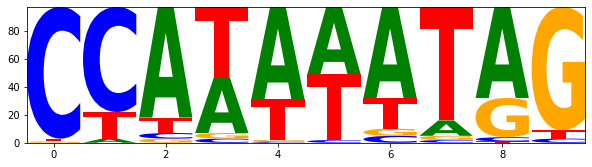

In [18]:
lm.Logo(counts_df)

In [19]:
pwm_df = pd.DataFrame(DNA_motif.pwm)

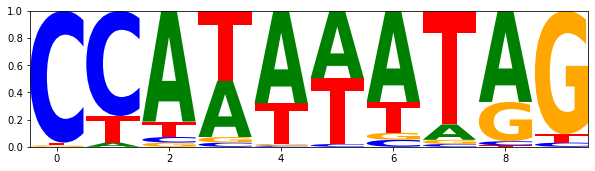

In [20]:
lm.Logo(pwm_df)

(Please note that Logos created on counts values and on pwm differ only in y axis labelling.)

In [21]:
pssm_df = pd.DataFrame(DNA_motif.pssm)

Because there are -inf values in pssm_df, we cannot plot logo immediately. Let's replace these values.

In [22]:
pssm_replaced_df = lm.transform_matrix(counts_df, from_type = 'counts', to_type = 'weight')

In [23]:
print(pssm_replaced_df)

            A         C         G         T
pos                                        
0   -4.658211  1.911644 -3.658211 -3.073249
1   -2.658211  1.589716 -4.658211 -0.336283
2    1.663717 -2.336283 -2.658211 -1.073249
3    0.699341 -2.658211 -2.336283  1.014214
4    1.407878 -3.658211 -3.658211  0.248679
5    0.956498 -3.073249 -4.658211  0.926751
6    1.386183 -2.073249 -2.073249 -0.134650
7   -1.073249 -3.073249 -2.658211  1.699341
8    1.386183 -2.658211  0.199770 -3.658211
9   -4.658211 -2.658211  1.817522 -1.850857


If you do not specify the argument center_values = True, the graphs becomes difficult to read

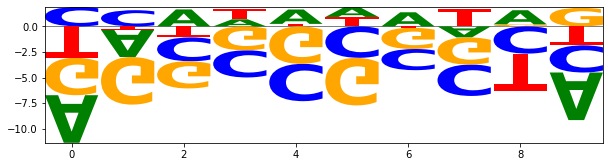

In [24]:
lm.Logo(pssm_replaced_df)

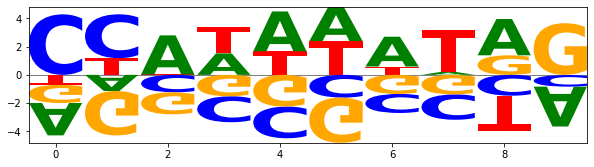

In [25]:
lm.Logo(pssm_replaced_df, center_values = True)

### Step 4. Style the graph

Personaly, my favourite logo graphs are probability matrix based ones, because y-axis always takes values from 0 till 1. 
If you use base your graph on values from pwm matrix of Seq object, you might come across that same cells of matrix have values equal 0. 
Therefore it is better to transform count matrix into probability matrix using function from logomaker package.

In [26]:
prob_df = lm.transform_matrix(counts_df, from_type = 'counts', to_type = 'probability')

In [27]:
type(prob_df)

pandas.core.frame.DataFrame

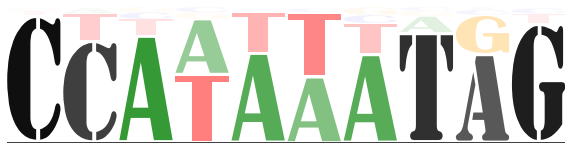

In [28]:
my_logo = lm.Logo(prob_df, 
                  fade_probabilities=True,
                  stack_order='small_on_top',
                  vpad = 0.05,
                 font_name = 'Britannic Bold')

my_logo.style_spines(visible = False)
my_logo.draw_baseline(linewidth=2,color='black',alpha=0.75)
my_logo.style_xticks(visible = False)
my_logo.style_glyphs_in_sequence('CC.....TAG', color='black', font_name = 'Stencil')
my_logo.ax.set_xticks([])
my_logo.ax.set_yticks([])
plt.savefig('my_logo.png')
plt.show()

Happy coding!